In [1]:
# required libraries

import pandas as pd #analysis
import matplotlib.pyplot as plt #vizualization

In [ ]:
pokemon_df = pd.read_csv('/content/Pokemon.csv')
pokemon_df.head(n=10) #will give top 10 rows

In [7]:
pokemon_df.sample(5) #random

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
432,387,Turtwig,Grass,NaN,318,55,68,64,45,55,31,4,False
202,187,Hoppip,Grass,Flying,250,35,35,40,35,55,50,2,False
260,241,Miltank,Normal,NaN,490,95,80,105,40,70,100,2,False
256,237,Hitmontop,Fighting,NaN,455,50,95,95,35,110,70,2,False
229,212,ScizorMega Scizor,Bug,Steel,600,70,150,140,65,100,75,2,False


In [13]:
# How many rows and columns are in this data?

rows, columns = pokemon_df.shape
print(f'Number of rows is {rows}, number of columns is {columns}')

Number of rows is 800, number of columns is 13


In [18]:
# How many unique Pokemon names are in this table?

unique_names = pokemon_df['Name'].nunique()
print(unique_names)

800


In [19]:
pokemon_df.head(2)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False


In [21]:
# How many pokemons have Attack greater than 100?
attack_greater_than_100 = pokemon_df[pokemon_df['Attack'] > 100]
print(len(attack_greater_than_100))

170


In [22]:
# How many pokemons have Defense greater than 100?
defense_greater_than_100 = pokemon_df[pokemon_df['Defense'] > 100]
print(len(defense_greater_than_100))

123


In [26]:
# How many pokeomons have both?

attack_defense_greater_than_100 = pokemon_df[(pokemon_df['Attack'] > 100) & (pokemon_df['Defense'] > 100)]
print(len(attack_defense_greater_than_100))

48


In [27]:
pokemon_df.head(2)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False


In [ ]:
# VALUE COUNTS!!! Create a grouped DataFrame that counts the number of Pokemons in each group for Type 1.

type1_pokemons = pokemon_df['Type 1'].value_counts().reset_index()
type1_pokemons

Text(0, 0.5, 'Count of Pokemons')

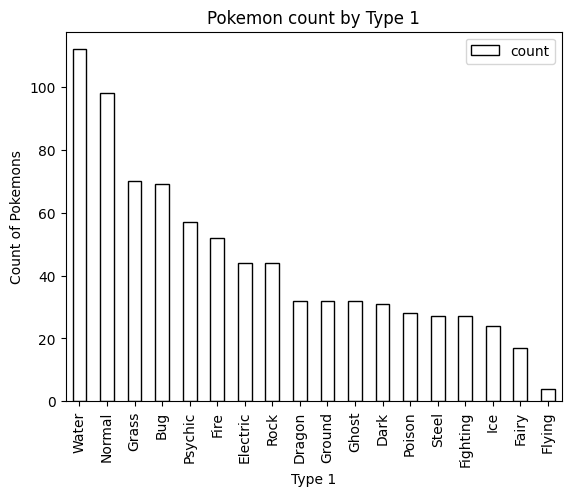

In [36]:
 #Bar chart

type1_pokemons.plot(x = 'Type 1', y = 'count', kind = 'bar', color='white', edgecolor='black')
plt.title('Pokemon count by Type 1')
plt.xlabel('Type 1')
plt.ylabel('Count of Pokemons')

Text(0, 0.5, 'Count of Pokemons')

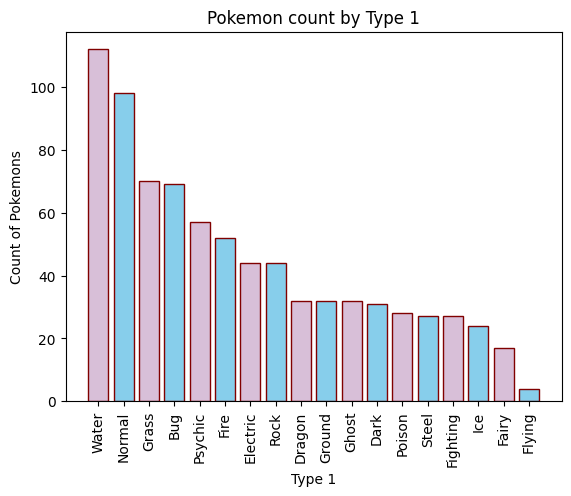

In [40]:
plt.bar(type1_pokemons['Type 1'], type1_pokemons['count'], color=['thistle','skyblue'], edgecolor='maroon')
plt.xticks(rotation=90)
plt.title('Pokemon count by Type 1')
plt.xlabel('Type 1')
plt.ylabel('Count of Pokemons')

In [45]:
# Which pokemon has the biggest attack?

pokemon_df['Attack'].max() #the highest value of the attack
pokemon_df['Attack'].idxmax() #index of the highest value

highest_attack = pokemon_df['Name'].iloc[pokemon_df['Attack'].idxmax()] #iloc - index location
print('Pokemon with the highest Attack is:',highest_attack )

print(f'Pokemon with the highest Attack is: {highest_attack} ')

Pokemon with the highest Attack is: MewtwoMega Mewtwo X
Pokemon with the highest Attack is: MewtwoMega Mewtwo X 


In [46]:
# Which pokemon has the lowest attack?

pokemon_df['Attack'].min() #the minimum value of the attack
pokemon_df['Attack'].idxmin() #index of the min value

lowest_attack = pokemon_df['Name'].iloc[pokemon_df['Attack'].idxmin()] #iloc - index location
print('Pokemon with the lowest Attack is:',lowest_attack )

Pokemon with the lowest Attack is: Chansey


In [47]:
#adding a column
pokemon_df['My unique column'] = 'Pokemon'

In [49]:
#adding calculated column
pokemon_df['Attack_Defense'] =  pokemon_df['Attack'] + pokemon_df['Defense']

In [55]:
# quick math calculations
pokemon_df['Attack'].sum()
pokemon_df['Attack'].min()
pokemon_df['Attack'].max()
pokemon_df['Attack'].mean() #the average

79.00125

In [57]:
pokemon_df['Attack above average'] = pokemon_df['Attack'] > pokemon_df['Attack'].mean()

In [ ]:
pokemon_df.insert(9, 'Attack_Defense', pokemon_df.pop('Attack_Defense'))
pokemon_df

In [62]:
# removing a column

pokemon_df.shape
pokemon_df = pokemon_df.drop(columns=['My unique column'])
pokemon_df.shape

(800, 15)

In [64]:
pokemon_df.head(2)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Attack_Defense,Sp. Def,Speed,Generation,Legendary,Attack above average
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,98,65,45,1,False,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,125,80,60,1,False,False


# HISTOGRAM

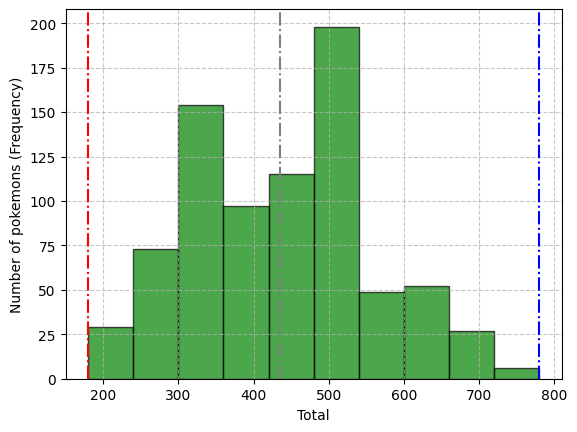

In [74]:
# analyze Total for each pokemon
plt.hist(pokemon_df['Total'], color='green', edgecolor='black', alpha=0.7) #alpha = transparency, default = 10bins

plt.xlabel('Total')
plt.ylabel('Number of pokemons (Frequency)')

#avg line
plt.axvline(pokemon_df['Total'].mean(), linestyle='dashdot', color='grey')

#min line
plt.axvline(pokemon_df['Total'].min(), linestyle='dashdot', color='red')

#max line
plt.axvline(pokemon_df['Total'].max(), linestyle='dashdot', color='blue')

plt.grid(linestyle='--', alpha=0.7)

In [70]:
pokemon_df['Total'].mean()

435.1025

Histogram counts: [276. 411. 113.]
Bin edges [180. 380. 580. 780.]


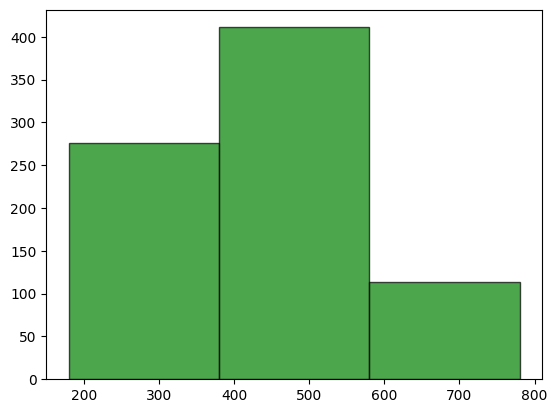

In [77]:
value = plt.hist(pokemon_df['Total'], bins = 3, color='green', edgecolor='black', alpha=0.7)

hist_values = value[0]
bin_edges = value[1]

print('Histogram counts:', hist_values)
print('Bin edges', bin_edges) #the end value is not included

In [80]:
# value_counts How can we calculate the same histogram with value counts?

pokemon_df['Total'].value_counts(bins=[179, 379, 579, 781])

(pokemon_df['Total']>579).sum()

113

In [83]:
pokemon_df.head(2)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Attack_Defense,Sp. Def,Speed,Generation,Legendary,Attack above average
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,98,65,45,1,False,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,125,80,60,1,False,False


array([<Axes: title={'center': 'False'}>,
       <Axes: title={'center': 'True'}>], dtype=object)

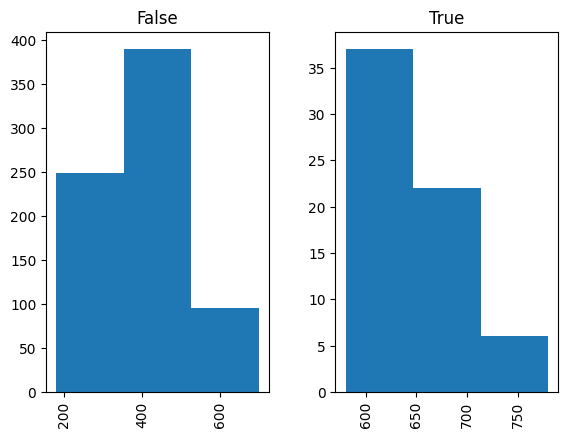

In [82]:
pokemon_df.hist(column='Total', by='Legendary', bins=3)